In [20]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from numpy import pi

# SÉRIE DE FOURIER

- Criando uma onda quadrada de amplitude $A = 5$ e período $T = 2\pi$. Lembrando que $y(t) = A\, sin(2\pi f t)$

$$y(t) = a_0 + \sum_{n=1}^\infty(a_n\,cos(n\omega t) + b_n\,sen(n\omega t))$$

- $a_0 = \frac{1}{T} \int_0^T f(t)\,dt$

- $a_n = \frac{2}{T} \int_0^T f(t)\,cos(nt)\,dt$

- $b_n = \frac{2}{T} \int_0^T f(t)\,sen(nt)\,dt$


- Lembrando que $\int_0^T = \int_0^\frac{T}{2} + \int_\frac{T}{2}^T$

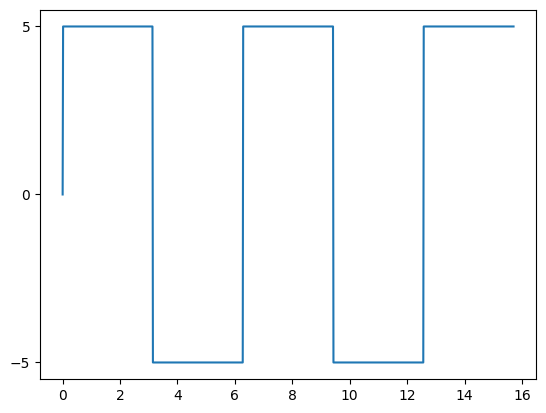

In [21]:
def squareWave(A, T, t):
    F = 1/T
    f = np.sin(2*pi*F * t)
    return A*np.sign(f)

t = np.linspace(0, 5*pi, 1000)
y = squareWave(5, 2*pi, t)

plt.plot(t, y)
plt.yticks([c for c in range(-5, 6, 5)])
plt.show()

In [22]:
T = 2*pi
A = 5
omega = 2*pi/T
t = sp.symbols('t')

In [23]:
integral = sp.integrate(A, (t, 0, T/2)) + sp.integrate(-A, (t, T/2, T))

a0 = 1/T * integral
a0

0

In [24]:
y = a0

for n in range(1, 100):
    integral = sp.integrate(A*sp.cos(n*t), (t, 0, T/2)) + sp.integrate(-A*sp.cos(n*t), (t, T/2, T))
    an = 2/T * integral

    integral = sp.integrate(A*sp.sin(n*t), (t, 0, T/2)) + sp.integrate(-A*sp.sin(n*t), (t, T/2, T))
    bn = 2/T * integral

    y += an*sp.cos(n*omega*t) + bn*sp.sin(n*omega*t)

In [25]:
def roundSympyFunction(expr, num_digits=3):
    return expr.xreplace({n: round(n, num_digits) for n in expr.atoms(sp.Float)})

y = roundSympyFunction(y)
y

6.366*sin(1.0*t) + 2.122*sin(3.0*t) + 1.273*sin(5.0*t) + 0.909*sin(7.0*t) + 0.707*sin(9.0*t) + 0.579*sin(11.0*t) + 0.49*sin(13.0*t) + 0.424*sin(15.0*t) + 0.374*sin(17.0*t) + 0.335*sin(19.0*t) + 0.303*sin(21.0*t) + 0.277*sin(23.0*t) + 0.255*sin(25.0*t) + 0.236*sin(27.0*t) + 0.22*sin(29.0*t) + 0.205*sin(31.0*t) + 0.193*sin(33.0*t) + 0.182*sin(35.0*t) + 0.172*sin(37.0*t) + 0.163*sin(39.0*t) + 0.155*sin(41.0*t) + 0.148*sin(43.0*t) + 0.141*sin(45.0*t) + 0.135*sin(47.0*t) + 0.13*sin(49.0*t) + 0.125*sin(51.0*t) + 0.12*sin(53.0*t) + 0.116*sin(55.0*t) + 0.112*sin(57.0*t) + 0.108*sin(59.0*t) + 0.104*sin(61.0*t) + 0.101*sin(63.0*t) + 0.098*sin(65.0*t) + 0.095*sin(67.0*t) + 0.092*sin(69.0*t) + 0.09*sin(71.0*t) + 0.087*sin(73.0*t) + 0.085*sin(75.0*t) + 0.083*sin(77.0*t) + 0.081*sin(79.0*t) + 0.079*sin(81.0*t) + 0.077*sin(83.0*t) + 0.075*sin(85.0*t) + 0.073*sin(87.0*t) + 0.072*sin(89.0*t) + 0.07*sin(91.0*t) + 0.068*sin(93.0*t) + 0.067*sin(95.0*t) + 0.066*sin(97.0*t) + 0.064*sin(99.0*t)

In [26]:
y = sp.lambdify(t, y, modules=['numpy'])
y(2*pi)

-8.022077863502981e-14

In [27]:
tData = np.linspace(0, 3*pi, 1000)
yData = y(tData)

([<matplotlib.axis.YTick at 0x7f9c35fc1000>,
 [Text(0, -5, '−5'), Text(0, 0, '0'), Text(0, 5, '5')])

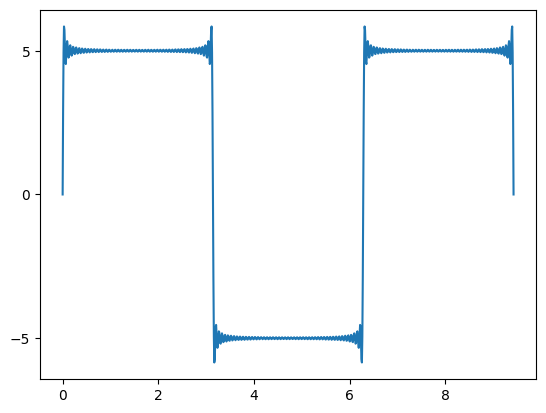

In [28]:
plt.plot(tData, yData)
plt.yticks([c for c in range(-5, 6, 5)])